# <p style="text-align: center;">EE 380L: Data Mining</p>
# <p style="text-align: center;">Assignment 5</p>
## <p style="text-align: center;">Total points: 50 </p>
## <p style="text-align: center;">Due: Tuesday, Apr. 18, submitted via Canvas by 11:59pm</p>


Your homework should be written in a **Jupyter notebook**. You may work in teams of two if you wish. Only one student per team needs to submit the assignment on Canvas. But be sure to include name and UTID for both students.  Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

# Question 1: Ensembles (3+3+3+3=12pts)
In this problem we are going to analyze the breast cancer dataset to predict whether or not an individual suffers from diabetes.  We will be using decision tree classifier with and without the meta methods – Bagging and Boosting. You are free to use either Python or R (take your pick) for this problem.

Use the following code to import the breast cancer dataset.
The dataset consists of 30 features and one target variable.

In [35]:
from sklearn import datasets
diabetes = datasets.load_breast_cancer()
X = diabetes.data
y = diabetes.target

Use the following code to split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 20** and **test_size = 0.33**.  Note that the random_state parameter is different from HW2.

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=20)

If you decided to use R, uncomment the below code and generate the .csv files to use in R.

In [37]:
#np.savetxt("X_train.csv", X_train, delimiter=",")
#np.savetxt("X_test.csv", X_test, delimiter=",")
#np.savetxt("y_train.csv", y_train, delimiter=",")
#np.savetxt("y_test.csv", y_test, delimiter=",")

(a) Fit a classification tree. Plot the tree, and report the mean error rate (fraction of incorrect labels) on test data. Report the confusion matrix. You can use rpart in R to fit the decision tree. In python, use the scikit learn’s tree package.

(b) Apply the random forest classifier to this dataset. Mention any design choices (with reasoning/justification) that you made, e.g. number of trees used, and number of features considered for each tree. Report the mean error rate and the confusion matrix.

(c) Use gradient boosted decision tree (gbdt) to classify the data. Again, you should mention any design choices that you made.  You can use gbm package in R. Report the mean error rate and the confusion matrix.


For random forests and gradient boosted decision trees in python, use scikit learn’s ensemble package.
In R, you can use randomForest and gbm packages.

Show the error rates (misclassification rate) obtained from these three models in a table. **How do these
models compare in terms of the misclassification rate?**


![title](tree.jpg)

In [46]:
print '\nQ1(a)\n'
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

depth=range(1,11)
print depth
params={'max_depth':depth,'criterion':['gini','entropy']}
tree_clf=tree.DecisionTreeClassifier()
clf=GridSearchCV(tree_clf,params,cv=5)
clf.fit(X_train,y_train)

##best parameters
best_depth=clf.best_params_['max_depth']
best_criterion=clf.best_params_['criterion']
print 'The best max_depth is: ',best_depth
print 'The best criterion is: ',best_criterion
tree_clf=tree.DecisionTreeClassifier(max_depth=best_depth,criterion=best_criterion)
tree_clf.fit(X_train,y_train)

##plot tree
with open("decision_tree_gini.dot","w") as f:
    f=tree.export_graphviz(tree_clf,out_file=f)
MER=1-tree_clf.score(X_test,y_test)
print 'Mean error rate of test data is: ',MER
y_pred=tree_clf.predict(X_test)
print 'Confusion matrix is:\n'
print confusion_matrix(y_test,y_pred)

print'\nQ1(b)\n'
print 'The design choices we have to consider are the number of trees, the number of features for each tree, '+\
' and the max depth of each tree. We make all these three design choices based on cross validation and choose the '+ \
'one that produces the minimum error rate on test data'

from sklearn.ensemble import RandomForestClassifier
import math

num_features=X.shape[1]
params={'n_estimators':range(1,20),'max_depth':range(1,10),'max_features':range(1,int(math.sqrt(num_features))+1)}
RF_clf=RandomForestClassifier()
clf=GridSearchCV(RF_clf,params,cv=5)
clf.fit(X_train,y_train)

##best parameters
best_num_estimators=clf.best_params_['n_estimators']
best_depth=clf.best_params_['max_depth']
best_num_features=clf.best_params_['max_features']
print 'best number of estimators is: ',best_num_estimators
print 'best max depth is: ',best_depth
print 'best number of features is: ',best_num_features
RF_clf=RandomForestClassifier(n_estimators=best_num_estimators,max_depth=best_depth,max_features=best_num_features)
RF_clf.fit(X_train,y_train)

MER=1-RF_clf.score(X_test,y_test)
print 'Mean error rate of test data is: ',MER
print 'Confusion matrix is: \n'
y_pred=RF_clf.predict(X_test)
print confusion_matrix(y_test,y_pred)



Q1(a)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The best max_depth is:  8
The best criterion is:  entropy
Mean error rate of test data is:  0.0478723404255
Confusion matrix is:

[[ 71   0]
 [  9 108]]

Q1(b)

The design choices we have to consider are the number of trees, the number of features for each tree,  and the max depth of each tree. We make all these three design choices based on cross validation and choose the one that produces the minimum error rate on test data
best number of estimators is:  12
best max depth is:  5
best number of features is:  5
Mean error rate of test data is:  0.031914893617
Confusion matrix is: 

[[ 69   2]
 [  4 113]]


In [44]:
print '\nQ1(c)\n'
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=20)

rates=np.linspace(0.1,1,10)
params={'loss':['deviance','exponential'],'learning_rate':rates,'max_depth':range(1,10)}
GBDT_clf=GradientBoostingClassifier()
clf=GridSearchCV(GBDT_clf,params,cv=5)
clf.fit(X_train,y_train)

##best parameter
# best_num_estimators=clf.best_params_['n_estimators']
best_learning_rate=clf.best_params_['learning_rate']
best_depth=clf.best_params_['max_depth']
best_loss=clf.best_params_['loss']

GBDT_clf=GradientBoostingClassifier(loss=best_loss,max_depth=best_depth,learning_rate=best_learning_rate)
GBDT_clf.fit(X_train,y_train)

MER=1-GBDT_clf.score(X_test,y_test)
print 'Mean error rate of test data is: ',MER
print 'Confusion matrix is: \n'
y_pred=GBDT_clf.predict(X_test)
print confusion_matrix(y_test,y_pred)


Q1(c)

Mean error rate of test data is:  0.0265957446809
Confusion matrix is: 

[[ 70   1]
 [  4 113]]


# Table
|                   |   Error Rate    |
|-------------------|-----------------|
|Classification Tree| 0.0478723404255 |
|Random Forest      | 0.031914893617  |
|Gradient Boosting  | 0.0265957446809 |



Gradient Boosting has the smallest error rate, Classification tree has the highest error rate and random forest has error rate in the middle.

# Question 2: Data Exploration and Regression Analysis (3+3+3+3+3=15pts)

Consider the dataset provided (Boston.csv) which has been slightly modified from the original "Boston Housing" data set. This dataset records properties of 510 housing zones in the Greater Boston area.


(a) Generate box-plots of the LSTAT (% of lower status in the population) and MEDVDerived (median home value) attributes and identify the cutoff values for outliers. Generate a scatterplot of MEDV against LSTAT; comment on how inclusion of the outliers would affect a predictive model of median home value as a function of % of lower status in the population. (Hint: Such effects may be easier to visualize if the outliers are in a different color or symbol than the other data.)

(b) Let us try to fit an MLR, using ordinary least squares, to this dataset with MEDVDerived as the dependent variable. Keep the first 350 records as a training set (call it Bostrain) which you will use to fit the model; the remaining 160 will be used as a test set (Bostest). 
Use only the following variables (expressed in “R” form for convenience) in your model:
MEDVDerived ∼ LSTAT + RM + CHAS + INDUS + TAX + RAD + BLACK.  Report the RMSE obtained on both Bostrain and Bostest. How much does this increase when you score your model on Bostest?

(c) Try to predict ”MEDVDerived” using a robust regression using Huber loss.  You can use the [sklearn package](  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html).  Set regularization parameter alpha to 0.0 and all other parameters as default.
Report RMSE obtained on both Bostrain and Bostest.

(d) Try to predict ”MEDVDerived” using a Multi-layer Perceptron (MLP) regression.  Use following parameter settings for MLPRegressor:

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
    batch_size=40, learning_rate_init = 0.005, hidden_layer_sizes = (2,)
    
Instead of fitting a model on original data, use StandardScaler to make each feature centered ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Whenever you have training and test data, fit a scaler on training data and use this scaler on test data. Here, scale only features (independent variables), not target variable y.  Report the RMSE obtained on both Bostrain and Bostest.

(e) Compare and comment on the model fits (plot actual vs. predicted values) obtained in (b), (c), and (d). How do outliers affect the relative performance of ordinary least squares regression, robust regression with Huber loss, and MLP?


Q2(a)

For LSTAT, top cutoff value is:  32.26
For LSTAT, bOttom cutoff value is:  -8.28
For MEDVDerived, top cutoff value is:  3.81068331175
For MEDVDerived, bottom cutoff value is:  2.23253001375


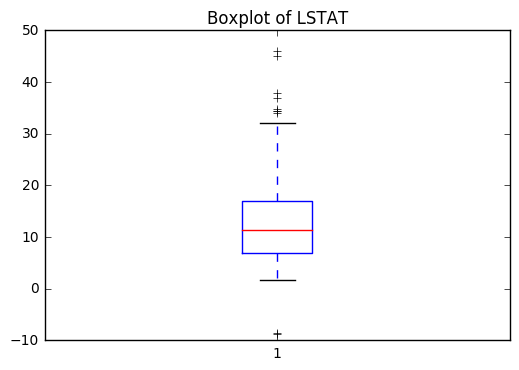

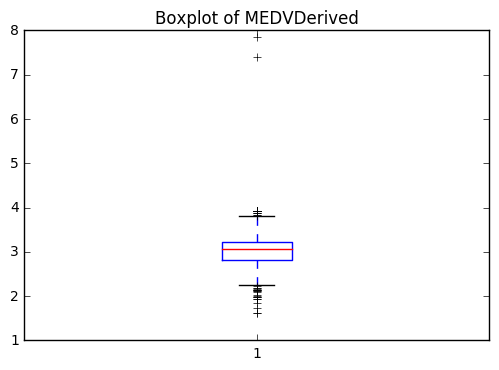

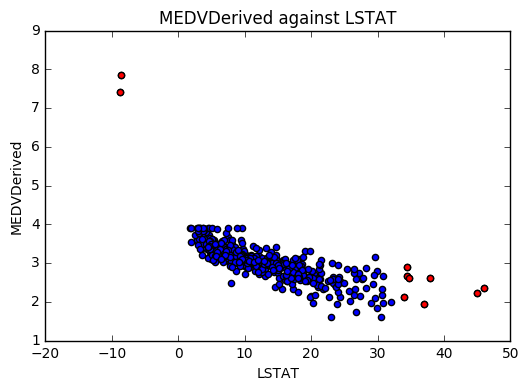

It is shown that there is a aproximately linear relation between median home value and % of lower status in population,outliers affect will affect this linear line arbitrarily. Outliers contribute a lot to regression error. The coefficients of thethe linear regression with and without outliers are quite different.

Q2(b)

root mean square error of Bostrain is:  0.265114395011
root mean square error of Bostest is:  0.603347150386
RMSE of test data increases by:  0.338232755375

Q2(c)

root mean square error of Bostrain is:  0.726328620531
root mean square error of Bostest is:  0.492398896713

Q2(d)

root mean square error of training data is:  0.30915661905
root mean square error of testing data is:  0.545635946567

Q2(e)



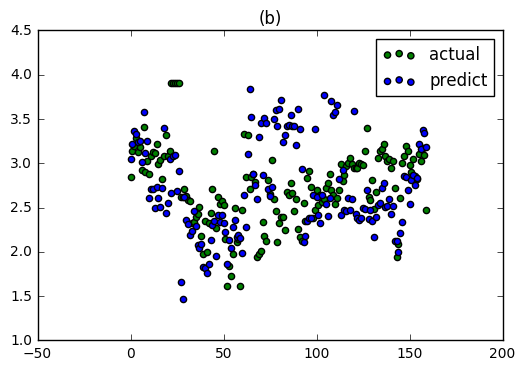

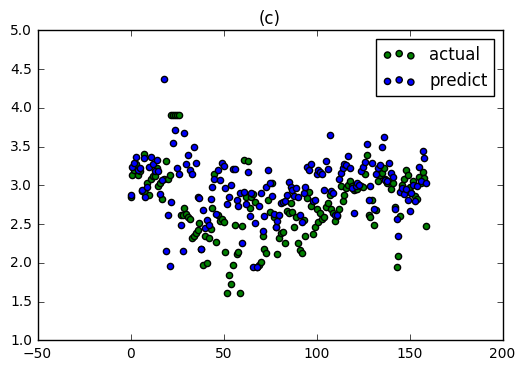

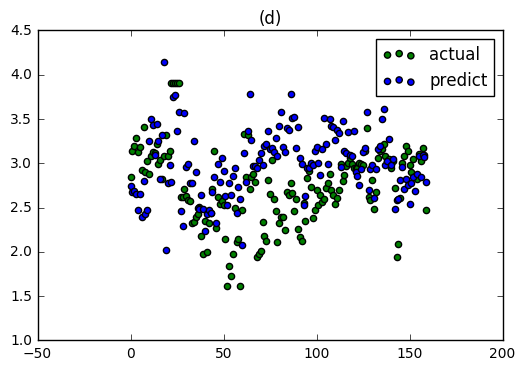

For ordinary least squares regresssion, outliers cause the test error rate significantly higher than training errorso its performance decreases when outliers exist. For regression with Huber loss, testing error rate is lower than trainingerror rate, outliers does not affect its performance. For MLP, its testing error rate is higher than training error rate, whichmeans outliers affect its performance, but it is not affected so much as orginary least squares regression.


In [97]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame

data=np.genfromtxt('Boston.csv',delimiter=',')
X=data[1:,1:-1]
y=data[1:,-1]

MED=DataFrame(data=y)
LSTAT=DataFrame(data=X[:,0])


print '\nQ2(a)\n'
Q1=LSTAT.describe().as_matrix()[4,0]
Q3=LSTAT.describe().as_matrix()[6,0]
IQR=Q3-Q1
top_cutoff=Q3+1.5*IQR
bottom_cutoff=Q1-1.5*IQR
print 'For LSTAT, top cutoff value is: ',top_cutoff
print 'For LSTAT, bOttom cutoff value is: ',bottom_cutoff


Q1=MED.describe().as_matrix()[4,0]
Q3=MED.describe().as_matrix()[6,0]
IQR=Q3-Q1
top_cutoff_y=Q3+1.5*IQR
bottom_cutoff_y=Q1-1.5*IQR
print 'For MEDVDerived, top cutoff value is: ',top_cutoff_y
print 'For MEDVDerived, bottom cutoff value is: ',bottom_cutoff_y

LSTAT=LSTAT.as_matrix()
MED=MED.as_matrix()
outlier_x=[]
outlier_y=[]
for i in range(LSTAT.shape[0]):
    if LSTAT[i]>top_cutoff or LSTAT[i]<bottom_cutoff or MED[i]>top_cutoff or MED[i]<bottom_cutoff:
        outlier_x.append(LSTAT[i])
        outlier_y.append(MED[i])
        np.delete(LSTAT,i,0)
        np.delete(MED,i,0)

plt.boxplot(X[:,0])
plt.title('Boxplot of LSTAT')
plt.figure()
plt.boxplot(y)
plt.title('Boxplot of MEDVDerived')

plt.figure()
plt.title("MEDVDerived against LSTAT")
plt.scatter(LSTAT,MED)
plt.scatter(outlier_x,outlier_y,c='r')
plt.ylabel('MEDVDerived')
plt.xlabel('LSTAT')
plt.show()

print 'It is shown that there is a aproximately linear relation between median home value and % of lower status in population,'+ \
'outliers affect will affect this linear line arbitrarily. Outliers contribute a lot to regression error. The coefficients of the'+\
'the linear regression with and without outliers are quite different.'
print '\nQ2(b)\n'

from sklearn import linear_model
from sklearn import metrics

Bostrain=X[0:350]
y_train=y[0:350]
y_test=y[350:]
Bostest=X[350:]
clf=linear_model.LinearRegression()
clf.fit(Bostrain,y_train)
pred_train_b=clf.predict(Bostrain)
pred_test_b=clf.predict(Bostest)
RMSE_train=np.sqrt((metrics.mean_squared_error(pred_train_b,y_train)))
RMSE_test=np.sqrt((metrics.mean_squared_error(pred_test_b,y_test)))
print 'root mean square error of Bostrain is: ',RMSE_train
print 'root mean square error of Bostest is: ',RMSE_test
print 'RMSE of test data increases by: ',RMSE_test-RMSE_train
##Huber regressor
print '\nQ2(c)\n'

clf=linear_model.HuberRegressor(alpha=0.0)
clf.fit(Bostrain,y_train)
pred_train_c=clf.predict(Bostrain)
pred_test_c=clf.predict(Bostest)
RMSE_train=np.sqrt((metrics.mean_squared_error(pred_train_c,y_train)))
RMSE_test=np.sqrt((metrics.mean_squared_error(pred_test_c,y_test)))
print 'root mean square error of Bostrain is: ',RMSE_train
print 'root mean square error of Bostest is: ',RMSE_test

print '\nQ2(d)\n'
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

mlp=MLPRegressor(activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
batch_size=40, learning_rate_init = 0.005, hidden_layer_sizes = (2,))

##scale data
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(Bostrain)
X_test = X_scaler.fit_transform(Bostest)
mlp.fit(X_train,y_train)
pred_train_d=mlp.predict(X_train)
pred_test_d=mlp.predict(X_test)
RMSE_train=np.sqrt((metrics.mean_squared_error(pred_train_d,y_train)))
RMSE_test=np.sqrt((metrics.mean_squared_error(pred_test_d,y_test)))
print 'root mean square error of training data is: ',RMSE_train
print 'root mean square error of testing data is: ',RMSE_test

print '\nQ2(e)\n'
x=range(y_test.shape[0])
plt.figure()
actual=plt.scatter(x,y_test,c='g')
predict=plt.scatter(x,pred_test_b,c='b')
plt.legend([actual,predict],['actual','predict'])
plt.title('(b)')
plt.figure()
actual=plt.scatter(x,y_test,c='g')
predict=plt.scatter(x,pred_test_c,c='b')
plt.legend([actual,predict],['actual','predict'])
plt.title('(c)')
plt.figure()
actual=plt.scatter(x,y_test,c='g')
predict=plt.scatter(x,pred_test_d,c='b')
plt.legend([actual,predict],['actual','predict'])
plt.title('(d)')
plt.show()

print 'For ordinary least squares regresssion, outliers cause the test error rate significantly higher than training error'+ \
'so its performance decreases when outliers exist. For regression with Huber loss, testing error rate is lower than training'+\
'error rate, outliers does not affect its performance. For MLP, its testing error rate is higher than training error rate, which'+\
'means outliers affect its performance, but it is not affected so much as orginary least squares regression.'


# Question 3 - Sampling (4+4=8pts)

1. CBS has come up with an extreme TV show, and each of its viewers either likes or hates it. (no middle ground here; we are in a “black and white age”). CBS wants to estimate what fraction p of its audience like the show by “randomly” calling n viewers and tallying their responses so as to estimate the true value of p to a fractional accuracy of within ±ε%, with a confidence of (1 − α) × 100%. For α = 0.05, ε = 0.02 (i.e. your answer will be pˆ ± 0.02), what is the minimum value of n needed if (i) true value p = 0.25 and (ii) p = 0.75?

2. Suppose for a certain value of p and choice of ε, you calculate that you will need 1000 samples for α = 0.05. You now decide to obtain a more accurate answer by either (i) reducing α to 0.01, keeping the same ε or by (ii) reducing ε by a factor of 3 from the original value, but maintaining α = 0.1. In each case how many samples would you need now?

# Answer
$$n>=p(1-p)(Z_{α/2}/ε)^2$$

1.

(i)$$n>=0.25*(1-0.25)*(1.96/0.02)^2=1800.75$$
So,n>=1801

(ii)$$n>=0.75*(1-0.75)*(1.96/0.02)^2=1800.75$$
So, n>=1801

2.

$$1000=p(1-p)(1.96/ε)^2$$

(i) when α reduces to be 0.01, $Z_{α/2}$ increases to be 2.58, so number of samples increases to $(2.58/1.96)^2*1000=1733$


(ii) number of samples = $(3*1.65/1.96)^2*1000=6379$

# Question 4 - Bias-variance Trandeoff (2pts)
How does the choice of K in the K-nearest neighbor classifier reflect a bias-variance tradeoff?

# Answer

The tradeoff here is increasing k will decrease variance and increase bias. While decreasing k will increase variance and decrease bias. This is because increasing K results in the averaging of more voters in each prediction, the variance decreases. When K increases, the boundary will gradually becomes blurred, which means bias increases. 


# Question 5 - Feature Selection (2pts)
Briefly explain what you understand by these two  methods for selecting a subset of features for a supervised learning problem: (i) forward selection and (ii) backward selection (no more than 1 paragraph).

# Answer 

(i)forward selection starts by regressing response variable on each feature and select the best feature. Then it regresses response variable on all subsets which consists of two predictors and finds out the best two features using cross validation. At each iteration, forward selection adds one feature which gives best performance to the existing model

(ii)backward selection begins with full set of features. At each iteration, it deletes a feature and finds out the best model among all possible deletions. The feature which gives the remaining model best performance after its deletion will be deleted from the existing model. 

# Question 6 - Eigenfaces (4+3+4=11pts)

In this question, you will explore an application of PCA in image analysis. This question requires images.tar.gz from Canvas. This archive contains 400 images in .pgm format taken from http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html. The images can be read into python as matrices using the steps: Coding guidelines below are only for convenience and you can use any other alternatives within python that provide the same functionality, if available.

To load a given image (e.g. ‘1.pgm’) as a matrix (grey scale representation of the image) and display it, use the following code snippet :

(400, 10304)

Q6(a)



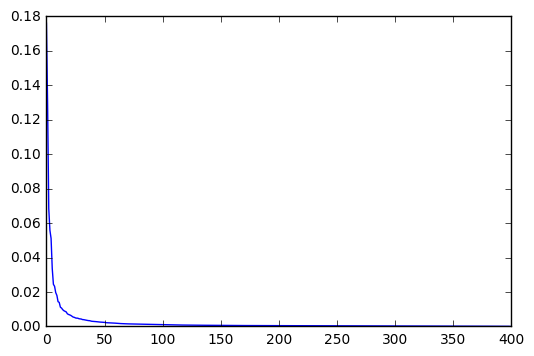

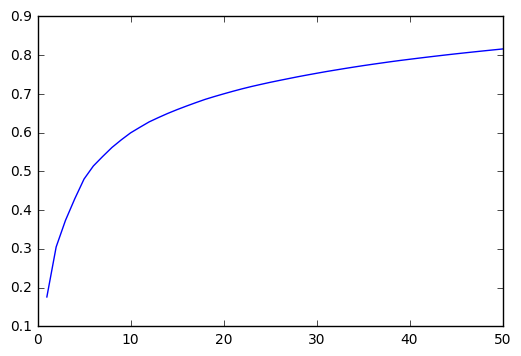


Q6(b)

N1= 1
N2= 6
N3= 44

Q6(c)



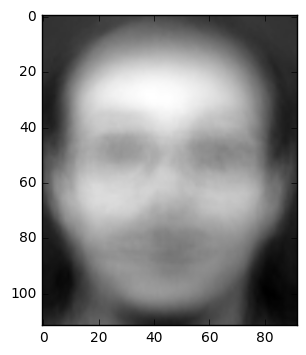

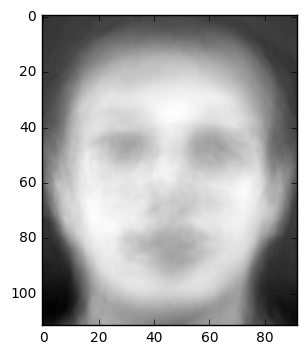

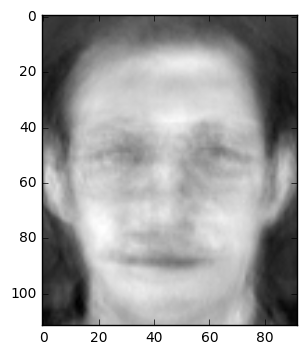

In [94]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import os
%matplotlib inline

img_path = os.getcwd()+'/images/'
img=misc.imread(img_path+'1.pgm')
img_width, img_height = np.shape(img)
img_mat = np.zeros((0,img_width*img_height))
for i in range(1,401):
    img = misc.imread(img_path + str(i) + '.pgm')
    img_vec=img.flatten()
    img_mat = np.vstack((img_mat, img_vec))
print img_mat.shape

print '\nQ6(a)\n'
from sklearn.decomposition import PCA

pca=PCA()
pca.fit(img_mat)
ratio=pca.explained_variance_ratio_
# print ratio
plt.plot(ratio)
plt.show()

r=ratio[:50]
plt.figure()
for i in range(1,50):
    r[i]+=r[i-1]
plt.plot(range(1,51),r)
plt.show()
print '\nQ6(b)\n'

min_i=[0,0,0]
v=[0.2,0.5,0.8]
for j in range(3):
    min_v=1
    for i in range(400):
        if abs(ratio[i]-v[j])<min_v:
            min_v=abs(ratio[i]-v[j])
            min_i[j]=i+1
print 'N1=',min_i[0]
print 'N2=',min_i[1]
print 'N3=',min_i[2]

print '\nQ6(c)\n'

import pylab
mu=np.mean(img_mat,axis=0)
nComp = min_i
for i in range(3):
    rec_mat = np.dot(pca.transform(img_mat)[:,:nComp[i]], pca.components_[:nComp[i],:])
    rec_mat+=mu
    rec_img = np.reshape(rec_mat[0,:], (img_width,img_height))
    pylab.figure()
    pylab.imshow(rec_img, cmap=plt.cm.gray)
pylab.show()


Each image matrix is of size 112 × 92. Vectorize the matrix for each image, and concatenate all image vectors to form a big 400 × 10304 data matrix. For example, to convert ‘img’ to its vector form ‘img vec’, use the following:

In [ ]:
img_vec = img.flatten()

To stack all images into a matrix, use numpy’s ‘vstack’ function. The following command will append the array ‘img_vec’ to the matrix ‘img_mat’. Note that you have to first initialize an empy ‘img mat’ with 10304 columns and 0 rows.

In [ ]:
img_width, img_height = np.shape(img)
img_mat = np.zeros((0,img_width*img_height))
img_mat = np.vstack((img_mat, img_vec))

Each face can be represented as weighted sum of canonical matrices called eigenfaces. You will project the data matrix onto lower dimensions and see how inclusion of directions in decreasing order of importance according to data spread impacts the quality of the image.

(a) Perform PCA using the sklearn [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) package.  Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the first 50 principal components of the img_mat data.  Refer to Figure 10.4 of JW for an example.  You may use the output attribute *explained variance ratio*. 

(b) How many principal components (N1, N2, N3) are required to explain cumulative variance of 20%, 50%, and 80%, respectively?

(c) Reconstruct your original matrix using the number of principal components (N1, N2, N3) you derived in question (b).  Then, pick any one image and plot.  Note that you first want to reshape your vectorized image using the ‘reshape’ command in numpy:

In [ ]:
# rec_img = np.reshape(rec_mat[n,:], (img_width,img_height))

Here ‘rec_mat’ is your recovered image matrix using only top-k principal components. (should be of dimension 400 × 10304) and you want to convert the nth vector to an image of the original size (img width = 112 and img height = 92).
You can plot an image matrix using the following function (pylab library should be loaded).

In [ ]:
# import pylab
# pylab.figure()
# pylab.imshow(rec_img, cmap=plt.cm.gray)
# pylab.show()